In [1]:
import matplotlib.pyplot as plt
from meerkat import mcp23008, tools, parser
from meerkat.base import time

from importlib import reload

In [2]:
relay = mcp23008.MCP23008(bus_n=1)

In [3]:
state = relay.get_all_channels()
tools.left_fill(s=bin(state)[2:], n=8, x="0")

'00000000'

In [4]:
relay.set_channel(channel=1, state=1)

In [5]:
state = relay.get_all_channels()
tools.left_fill(s=bin(state)[2:], n=8, x="0")

'00000001'

In [6]:
relay.set_channel(channel=1, state=0)

In [7]:
state = relay.get_all_channels()
tools.left_fill(s=bin(state)[2:], n=8, x="0")

'00000000'

In [8]:
relay.set_channel(channel=2, state=0)

In [9]:
state = relay.get_all_channels()
tools.left_fill(s=bin(state)[2:], n=8, x="0")

'00000000'

In [10]:
relay.set_channel(channel=4, state=2)

In [11]:
state = relay.get_all_channels()
tools.left_fill(s=bin(state)[2:], n=8, x="0")

'00001000'

In [12]:
relay.publish(description="relay_test1")

'{"description": "relay_test1", "sample_n": 0, "relay_state": "00001000", "std_time_ms": "2020-11-21 14:25:58.285585"}'

In [13]:
# default writer format is CSV, switch to JSON
relay.writer_output = 'json'
relay.json_writer.description = "driver_demo"

In [14]:
# writer method with description and sample number
relay.write(description='test_2')

In [15]:
relay.json_writer.path

'2020_11_21_14_25_58_mcp23008.jsontxt'

In [16]:
with open(relay.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_2", "sample_n": 1, "relay_state": "0b00001000", "std_time_ms": "2020-11-21 14:25:58.327600"}





In [17]:
# switch back to CSV format
relay.writer_output = 'csv'
relay.csv_writer.description = "driver_demo"

In [18]:
relay.set_all_channels(state=0b11111111)
for n in range(1,9):
    print("Toggling channel:", n)
    relay.set_channel(channel=n, state=1)
    relay.write(description="channel_ramp_test_1")
    time.sleep(0.25)
    relay.set_channel(channel=n, state=0)
    relay.write(description="channel_ramp_test_1")
    time.sleep(0.25)
    relay.write(description="channel_ramp_test_1")
    time.sleep(0.25)
    relay.set_channel(channel=n, state=1)
    relay.write(description="channel_ramp_test_1")
    time.sleep(0.25)

Toggling channel: 1
Toggling channel: 2
Toggling channel: 3
Toggling channel: 4
Toggling channel: 5
Toggling channel: 6
Toggling channel: 7
Toggling channel: 8


In [19]:
relay.csv_writer.path

'2020_11_21_14_25_58_mcp23008.csv'

In [20]:
m, df = parser.csv_resource(relay.csv_writer.path)

In [21]:
m

{'encoding': 'utf-8',
 'format': 'text/csv',
 'standard': 'Follow RFC 4180',
 'line_terminator': '\n',
 'quote_char': '"',
 'double_quote': True,
 'escape_char': '\\',
 'null_sequence': 'NA',
 'comment': '#',
 'metadata': {'name': 'MCP23008',
  'urls': 'https://jap.hu/electronic/relay_module_i2c.html',
  'manufacturer': 'Peter Jakab',
  'header': ['description', 'sample_n', 'relay_state'],
  'dtype': ['str', 'int', 'str'],
  'accuracy': [None, 'count', 'bool'],
  'bus_n': 1,
  'bus_addr': 32,
  'description': '8 channel I2C relay board by Peter Jakab'},
 'path': '2020_11_21_14_25_58_mcp23008.csv',
 'time_source': 'std_time_ms',
 'strfmtime': '%Y-%m-%d %H:%M:%S.%f',
 'delimiter': ',',
 'skip_initial_space': True,
 'case_sensitive_header': False,
 'skip_lines': 1,
 'description': 'driver_demo'}

In [22]:
df

,std_time_ms,description,sample_n,relay_state,datetime64_ns
0,2020-11-21 14:25:58.434781,channel_ramp_test_1,1,0b11111111,2020-11-21 14:25:58.434781
1,2020-11-21 14:25:58.706906,channel_ramp_test_1,1,0b11111110,2020-11-21 14:25:58.706906
2,2020-11-21 14:25:58.968327,channel_ramp_test_1,1,0b11111110,2020-11-21 14:25:58.968327
3,2020-11-21 14:25:59.241089,channel_ramp_test_1,1,0b11111111,2020-11-21 14:25:59.241089
4,2020-11-21 14:25:59.515519,channel_ramp_test_1,1,0b11111111,2020-11-21 14:25:59.515519
5,2020-11-21 14:25:59.788332,channel_ramp_test_1,1,0b11111101,2020-11-21 14:25:59.788332
6,2020-11-21 14:26:00.049915,channel_ramp_test_1,1,0b11111101,2020-11-21 14:26:00.049915
7,2020-11-21 14:26:00.322603,channel_ramp_test_1,1,0b11111111,2020-11-21 14:26:00.322603
8,2020-11-21 14:26:00.597019,channel_ramp_test_1,1,0b11111111,2020-11-21 14:26:00.597019
9,2020-11-21 14:26:00.869818,channel_ramp_test_1,1,0b11111011,2020-11-21 14:26:00.869818


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


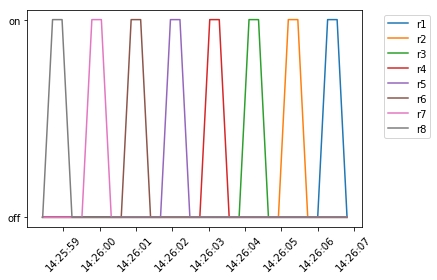

In [23]:
# convert register meaning to plotable format
for n in range(2, 10):
    _s = df.relay_state.str[n].apply(lambda x: {"0": "on", "1": "off"}[x])
    df["r{}".format(n-2+1)] = _s
    
for c in ["r1", "r2", "r3", "r4", "r5", "r6", "r7", "r8"]:
    plt.plot(df.datetime64_ns, df[c], label=c)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');